<p align="center">
  <img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" height=300px width=80%/>

  Image source: github.com/zalandoresearch/fashion-mnist
</p>

##Importing the libraries and dependencies

In [75]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [76]:
tf.__version__

'2.12.0'

## Preparing the dataset

### Loading the dataset from keras dataset library

In [77]:
#load the datasets
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### Splitting the data into train and validation set

In [78]:
#train and validation set
X_train, X_val, y_train,y_val = train_test_split(X_train_full, y_train_full, test_size=0.166)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((50040, 28, 28), (50040,), (9960, 28, 28), (9960,))

###Normalise the images

Divide each image in the training , validation and testing set with the maxiumum number of pixels i.e. 255.

This is to ensure that each pixel is in the range [0, 1]. 

Also normalizing images helps the model to converge faster.

In [79]:
X_train = X_train/255.0

In [80]:
X_val = X_val/255.0

In [81]:
X_test = X_test/255.0

###Reshaping the dataset

reshape the input to be in a vector format, as is required by a fully connected network

In [82]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(50040, 784)

In [83]:
X_val = X_val.reshape(-1, 28*28)
X_val.shape

(9960, 784)

In [84]:
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

##Building an Artificial Neural Network

Step 1 : Defining the model

Step 2 : Adding the first layer (Dense layer)

Step 3 :  Adding a Dropout layer

Step 4 :  Adding the second layer (output layer)

**Defining the model** : 

Define an object of the Sequential model.

In [85]:
model = tf.keras.models.Sequential()

**Adding the first layer (Dense layer):**

Hyper-parameters used for the layer are:

number of units/neurons: 128

activation function: ReLU

input_shape: (784, )

In [86]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

**Adding a Dropout layer**

Dropout is a Regularization technique where the neurons in a layer are set to zero. 

In this way, while training those neurons won't be updated. 

This reduces the chance of overfitting of a network.

In [87]:
model.add(tf.keras.layers.Dropout(rate=0.40))
#dropout rate can be changed as needed

**Adding the second layer (output layer)**

no of units == number of output classes (10 in the case of Fashion MNIST)

activation function = 'softmax'(as it gives probability summing up to 1)

In [88]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

**Final Model after some trails**

In [133]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(rate=0.40))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.50))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

## Compile the model

**Optimizer**: Adam

**Loss**: Sparse categorical crossentropy - this is used when the number of classes to predict is more than two

In [134]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics= ['sparse_categorical_accuracy'])

In [135]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


###Plot the model

plot the model and export the image 

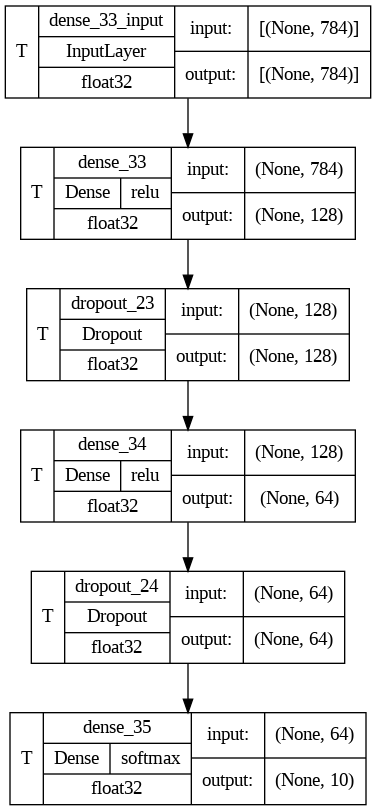

In [136]:
tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_dtype=True,
                          show_layer_activations=True,
                          show_trainable=True)

## fit the model

training the model to learn from the image data

In [137]:
#train model
history = model.fit(X_train, y_train, epochs=20, validation_data=[X_val, y_val])


Epoch 1/20
1564/1564 [==============================] - 7s 4ms/step - loss: 0.7664 - sparse_categorical_accuracy: 0.7279 - val_loss: 0.4474 - val_sparse_categorical_accuracy: 0.8345
Epoch 2/20
1564/1564 [==============================] - 6s 4ms/step - loss: 0.5453 - sparse_categorical_accuracy: 0.8085 - val_loss: 0.4008 - val_sparse_categorical_accuracy: 0.8496
Epoch 3/20
1564/1564 [==============================] - 6s 4ms/step - loss: 0.5060 - sparse_categorical_accuracy: 0.8220 - val_loss: 0.3868 - val_sparse_categorical_accuracy: 0.8556
Epoch 4/20
1564/1564 [==============================] - 6s 4ms/step - loss: 0.4802 - sparse_categorical_accuracy: 0.8335 - val_loss: 0.3689 - val_sparse_categorical_accuracy: 0.8622
Epoch 5/20
1564/1564 [==============================] - 6s 4ms/step - loss: 0.4609 - sparse_categorical_accuracy: 0.8377 - val_loss: 0.3687 - val_sparse_categorical_accuracy: 0.8632
Epoch 6/20
1564/1564 [==============================] - 6s 4ms/step - loss: 0.4438 - spars

## plot the metrics

In [138]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

<Axes: >

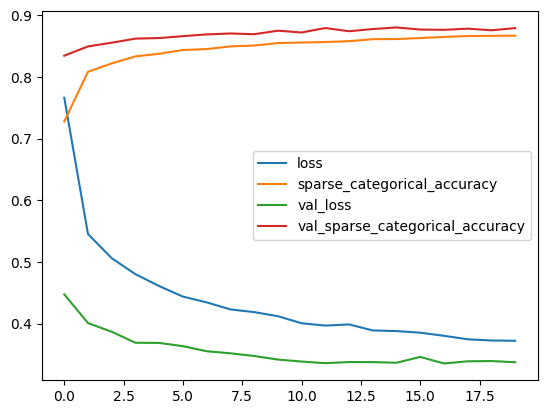

In [139]:
pd.DataFrame(history.history).plot()

## Evaluate the model

Checking the accuracy of the model on test(unseen) set

In [140]:
#evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3681 - sparse_categorical_accuracy: 0.8724


(0.3681429326534271, 0.8723999857902527)

In [141]:
print("Test accuracy is : {}".format(test_accuracy))

Test accuracy is : 0.8723999857902527


## Save the model for deployment

Saving the architecture (topology) of the network

In [142]:
#save the model
model_json = model.to_json()
with open("fashin_model.json","w") as json_file:
  json_file.write(model_json)

Saving network weights

In [143]:
#save weights
model.save_weights("fashion_model.h5")